In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
from scipy import stats  

In [ ]:
def load_data(data_path: str, groups_path: str) -> (pd.DataFrame,pd.DataFrame):
    try:
        df_data = pd.read_csv(data_path)
    except Exception as exc:
        raise FileNotFoundError(f"Unable to read data file '{data_path}': {exc}")

    try:
        df_groups = pd.read_csv(groups_path)
    except Exception as exc:
        raise FileNotFoundError(f"Unable to read groups file '{groups_path}': {exc}")


    return df_data,df_groups

In [ ]:
df_data, df_groups = load_data("results/artificial_synthPopSurvey.csv","data/BlockWorld/artificial_groups.csv")

In [ ]:
def plot_group(group,df_data,df_groups):
    
    print("-" * 120 )
    select = df_groups.loc[df_groups['group'] == group, 'heading'].tolist()
    filtered_df = df_data[df_data['variable'].isin(select)].reset_index(drop=True)
    plt.figure(figsize=(6, 4))
    for var in filtered_df['variable'].unique():
        sub = filtered_df[filtered_df['variable'] == var]
        plt.scatter(
            sub['synth_fraction'],
            sub['constraint_fraction'],
            label=var,
            s=3,                    
            alpha=0.3               
        )

    plt.xlabel("synth_fraction")
    plt.ylabel("constraint_fraction")
    plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()
    
    print("\n")
    
    r, p = stats.pearsonr(filtered_df['synth_fraction'], filtered_df['constraint_fraction'])

    # ---- linear regression (ordinary least squares) --------------------
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        sub['synth_fraction'],
        sub['constraint_fraction']
    )
    # R² is just r_value**2
    r_squared = r_value ** 2
    print(f"  Pearson r = {r:.3f} (p = {p:.3g})")
    print(f"  Linear fit: y = {slope:.3f}·x + {intercept:.3f}")
    print(f"  R² = {r_squared:.3f}\n")
  
    






------------------------------------------------------------------------------------------------------------------------


UnboundLocalError: cannot access local variable 'r' where it is not associated with a value

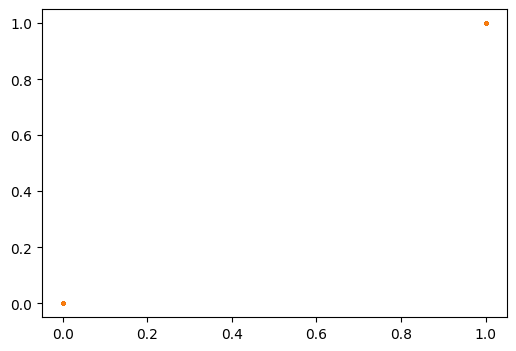

In [ ]:
for g in df_groups["group"].unique():
    plot_group(g,df_data,df_groups);
